In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def log_to_dict(log):
    a=log[1:-1].split(', ')
    log=dict()
    for x in a:
        x=x.split(':')
        log[x[0][1:-1]]=float(x[1])
    return log

def logs_to_dataframe(logs):
    a=[]
    for log in logs:
        a.append(log_to_dict(log))
    return pd.DataFrame(a)

# Unet

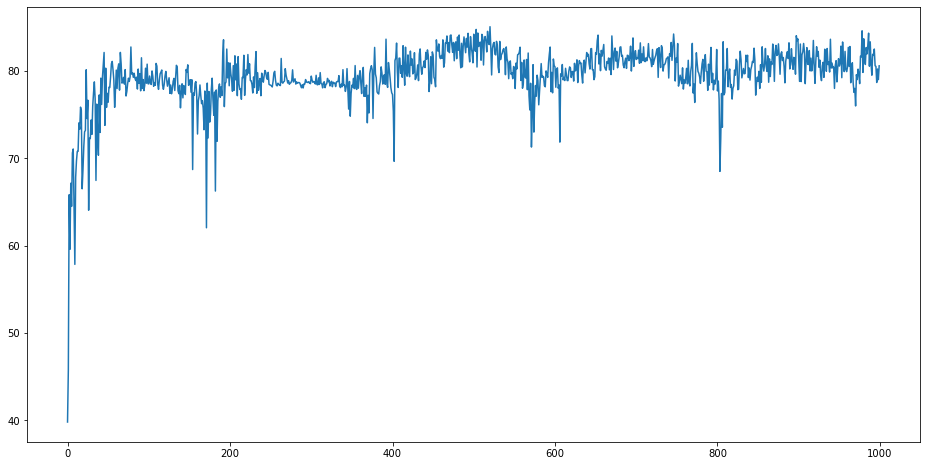

In [15]:
f = open('logs/Unet_results' , mode="r")
logs=f.read()
logs=logs.split('\n')[:1000]
unet_res=logs_to_dataframe(logs)
plt.figure(figsize=(16,8))
plt.plot(unet_res['epochs'], unet_res['f1 score'])
plt.show()

# Unet++

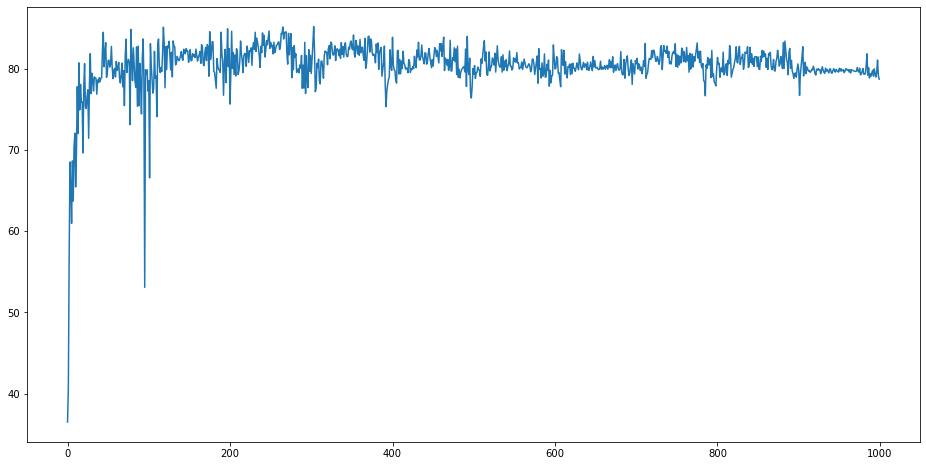

In [16]:
f = open('logs/UnetPP_results' , mode="r")
logs=f.read()
logs=logs.split('\n')[:1000]
unetpp_res=logs_to_dataframe(logs)
plt.figure(figsize=(16,8))
plt.plot(unetpp_res['epochs'], unetpp_res['f1 score'])
plt.show()

# Linknet

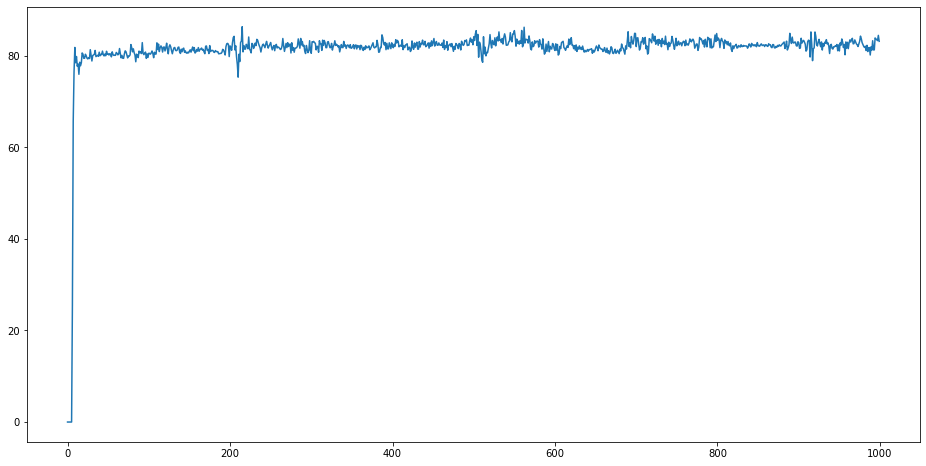

In [58]:
f = open('logs/Linknet_results' , mode="r")
logs=f.read()
logs=logs.split('\n')[:1000]
linknet_res=logs_to_dataframe(logs)
plt.figure(figsize=(16,8))
plt.plot(linknet_res['epochs'], linknet_res['f1 score'])
plt.show()

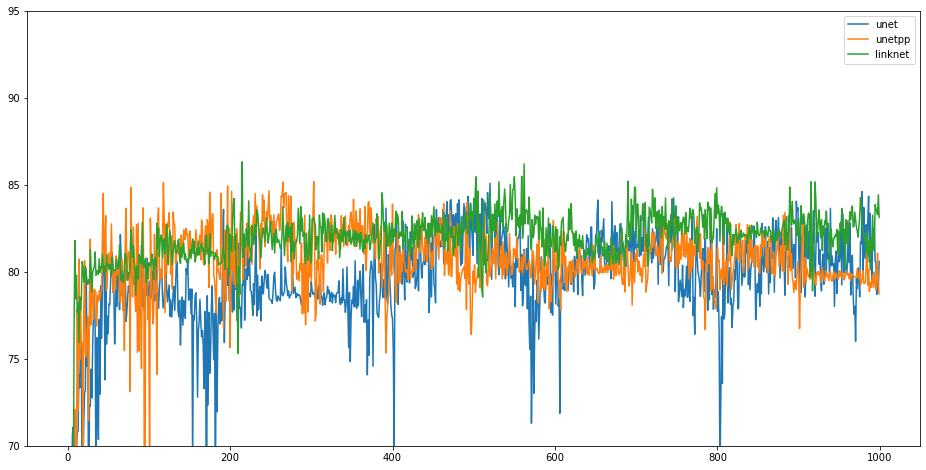

In [60]:
plt.figure(figsize=(16,8))
plt.plot(unet_res['epochs'], unet_res['f1 score'],label='unet')
plt.plot(unetpp_res['epochs'], unetpp_res['f1 score'],label='unetpp')
plt.plot(linknet_res['epochs'], linknet_res['f1 score'],label='linknet')
plt.legend()
plt.ylim((70,95))
plt.show()

# Data augmentation

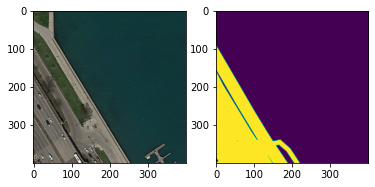

In [38]:
from PIL import Image
import numpy as np
import albumentations as alb
im=np.array(Image.open('data/testing/images/satImage_091.png'))
msk=np.array(Image.open('data/testing/groundtruth/satImage_091.png'))
_,axs=plt.subplots(1,2)
axs[0].imshow(im)
axs[1].imshow(msk)
plt.show()

## Flip and Transpose

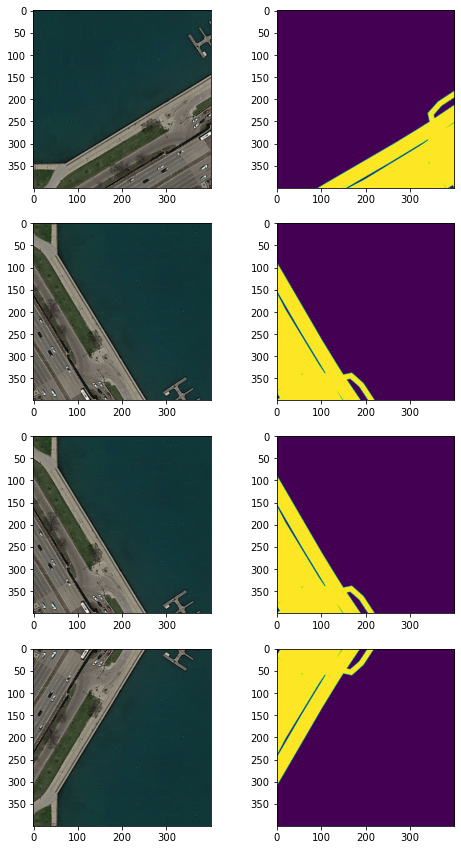

In [40]:

rotation= alb.Compose(
        [
            alb.Flip(),
            alb.Transpose()
        ]
    )
_,axs=plt.subplots(4,2,figsize=(8,15))
for i in range(4):
    output=rotation(image=im,mask=msk)
    a,b=output['image'],output['mask']
    axs[i,0].imshow(a)
    axs[i,1].imshow(b)
plt.show()

## Rotation

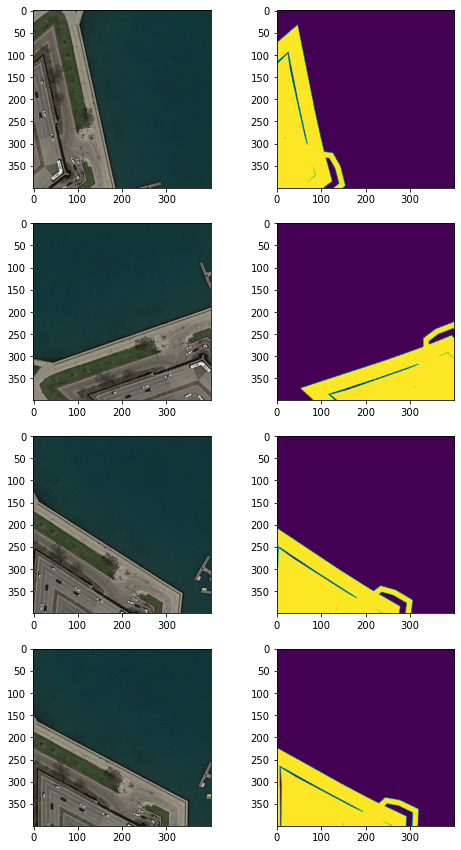

In [37]:
import albumentations as alb
rotation= alb.Rotate(p=1)
_,axs=plt.subplots(4,2,figsize=(8,15))
for i in range(4):
    output=rotation(image=im,mask=msk)
    a,b=output['image'],output['mask']
    axs[i,0].imshow(a)
    axs[i,1].imshow(b)
plt.show()

##  Coarse Dropout

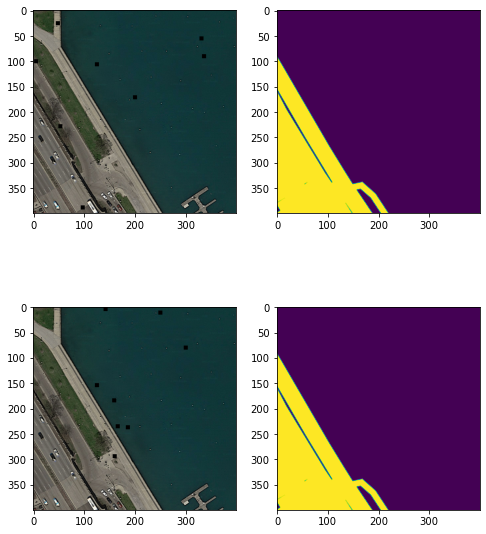

In [47]:
import albumentations as alb
rotation= alb.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=1)
_,axs=plt.subplots(2,2,figsize=(8,10))
for i in range(2):
    output=rotation(image=im,mask=msk)
    a,b=output['image'],output['mask']
    axs[i,0].imshow(a)
    axs[i,1].imshow(b)
plt.show()

## Distortion

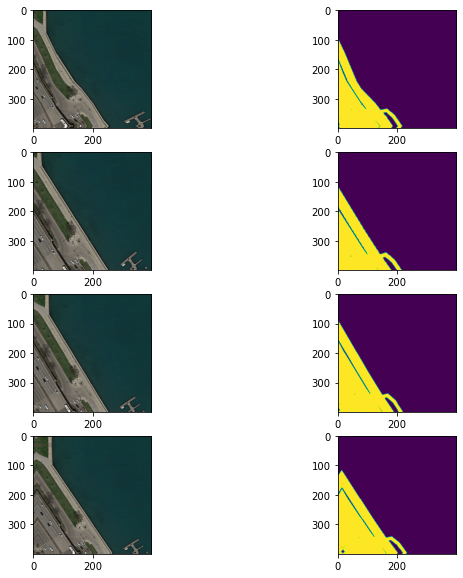

In [51]:
import albumentations as alb
rotation= alb.OneOf([
                alb.OpticalDistortion(p=1),
                alb.GridDistortion(p=1),
                alb.ElasticTransform(p=1)
            ], p=1)
_,axs=plt.subplots(4,2,figsize=(10,10))
for i in range(4):
    output=rotation(image=im,mask=msk)
    a,b=output['image'],output['mask']
    axs[i,0].imshow(a)
    axs[i,1].imshow(b)
plt.show()

# Result with DA

## Linknet

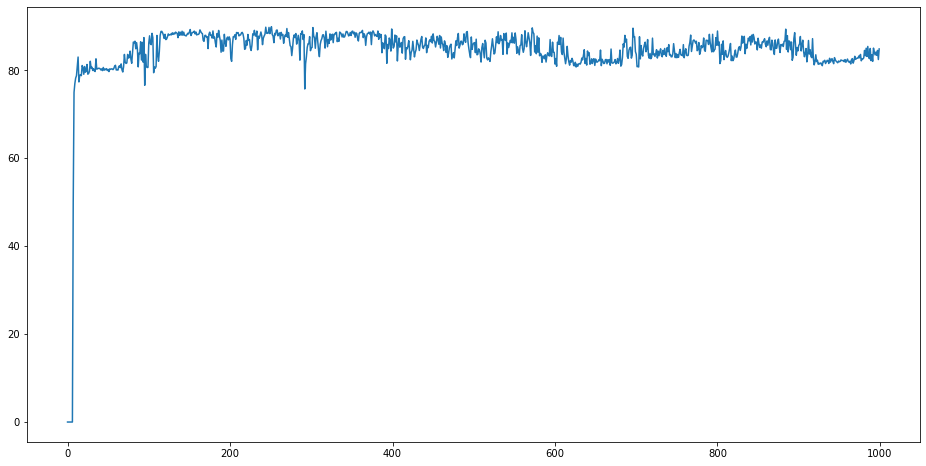

In [52]:
f = open('logs/LinknetFinal_results' , mode="r")
logs=f.read()
logs=logs.split('\n')[:1000]
linknetfinal_res=logs_to_dataframe(logs)
plt.figure(figsize=(16,8))
plt.plot(linknetfinal_res['epochs'], linknetfinal_res['f1 score'])
plt.show()

## Linknet1

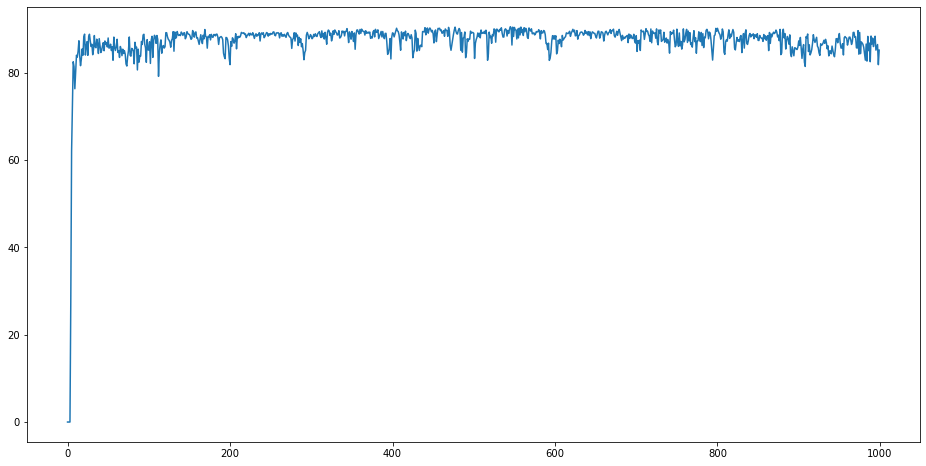

In [53]:
f = open('logs/Linknet1Final_results' , mode="r")
logs=f.read()
logs=logs.split('\n')[:1000]
linknet1final_res=logs_to_dataframe(logs)
plt.figure(figsize=(16,8))
plt.plot(linknet1final_res['epochs'], linknet1final_res['f1 score'])
plt.show()

## DinkNet

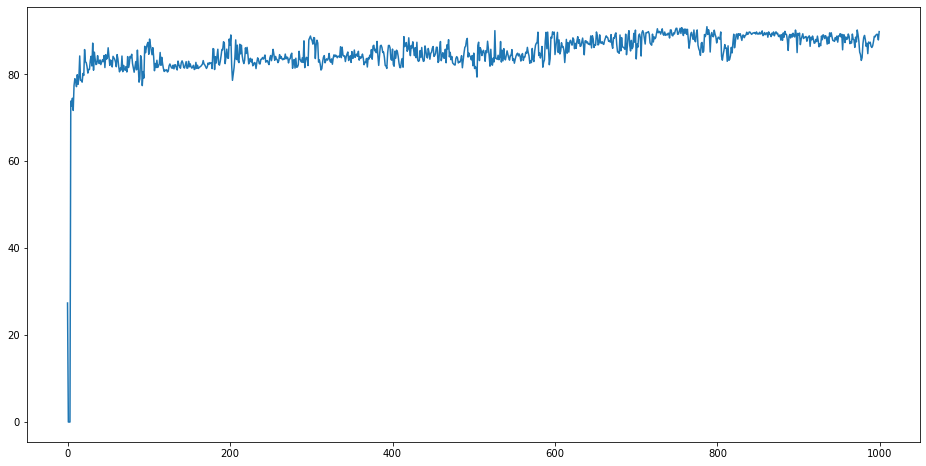

In [54]:
f = open('logs/DinkNetFinal_results' , mode="r")
logs=f.read()
logs=logs.split('\n')[:1000]
dinknetfinal_res=logs_to_dataframe(logs)
plt.figure(figsize=(16,8))
plt.plot(dinknetfinal_res['epochs'], dinknetfinal_res['f1 score'])
plt.show()

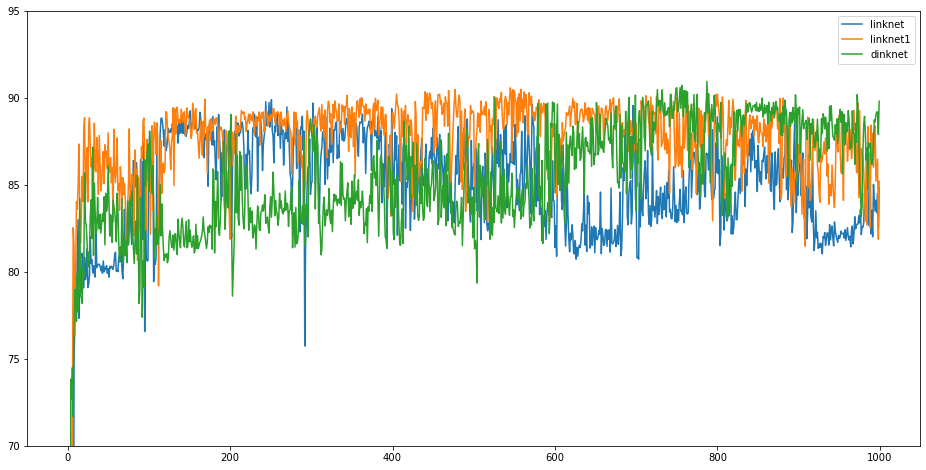

In [57]:
plt.figure(figsize=(16,8))
plt.plot(linknetfinal_res['epochs'], linknetfinal_res['f1 score'],label='linknet')
plt.plot(linknet1final_res['epochs'], linknet1final_res['f1 score'],label='linknet1')
plt.plot(dinknetfinal_res['epochs'], dinknetfinal_res['f1 score'],label='dinknet')
plt.legend()
plt.ylim((70,95))
plt.show()